# 1. Carregar o Dataset:

- Baixar o dataset do Titanic da plataforma Kaggle (link aqui).

- Carregar os dados no ambiente Python utilizando pandas.

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')
print (df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# 2. Limpeza dos Dados:

- Preencher os valores ausentes na coluna Age com a mediana.

- Preencher os valores ausentes na coluna Embarked com a moda.

- Descartar a coluna Cabin por conter muitos valores ausentes.

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['age']])
df['age'] = imputer.transform(df[['age']])

In [8]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 3. Pré-processamento dos Dados:

- Converter a variável Sex em numérica (0 para feminino e 1 para masculino).
- Converter os valores de Embarked em numéricos (0 para Cherbourg, 1 para Queenstown e 2 para Southampton).

In [10]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [11]:
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 4. Definir Features e Alvo:

- Utilizar as seguintes variáveis como features: Pclass (classe da passagem), Sex (gênero), Age (idade), SibSp (número de irmãos/cônjuges) e Fare (tarifa).
- Definir a variável Survived como alvo (target).

In [12]:
x = df[['pclass', 'sex', 'age', 'sibsp', 'fare']]
y = df['survived']

# 5. Árvore de Decisão:

- Treinar um modelo de Árvore de Decisão usando a biblioteca scikit-learn.
- Avaliar o modelo com uma validação cruzada de 5 folds e registrar a acurácia média.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

df_model = DecisionTreeClassifier()
scores = cross_val_score(df_model, x, y, cv=5)
print("Acurácia média: {:.2f}".format(scores.mean()))

Acurácia média: 0.77


# 6. Random Forest:

- Treinar um modelo de Random Forest e comparar seu desempenho com o da Árvore de Decisão.
- Avaliar o modelo utilizando a mesma validação cruzada de 5 folds.
- Extra: Ajustar os hiperparâmetros do Random Forest utilizando GridSearchCV para melhorar a performance do modelo.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, x, y, cv=5)
print(f' Acurácia média (Random Forest): {rf_scores.mean():.4f}')

 Acurácia média (Random Forest): 0.8171


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x, y)
print(f'Melhores parâmetros: {grid_search.best_params_}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


# 7. Importância das Variáveis:

- No modelo de Random Forest, verificar a importância das variáveis (features) utilizando o atributo feature_importances_.
- Gerar um gráfico de barras mostrando a importância de cada variável no modelo.
- Interpretar quais variáveis mais influenciam a previsão de sobrevivência e discutir esses resultados.

In [22]:
best_rf_model = grid_search.best_estimator_

importances = best_rf_model.feature_importances_

for feature, importance in zip(x.columns, importances):
    print(f'{feature}: {importance:.4f}')

pclass: 0.1296
sex: 0.3881
age: 0.2011
sibsp: 0.0521
fare: 0.2291


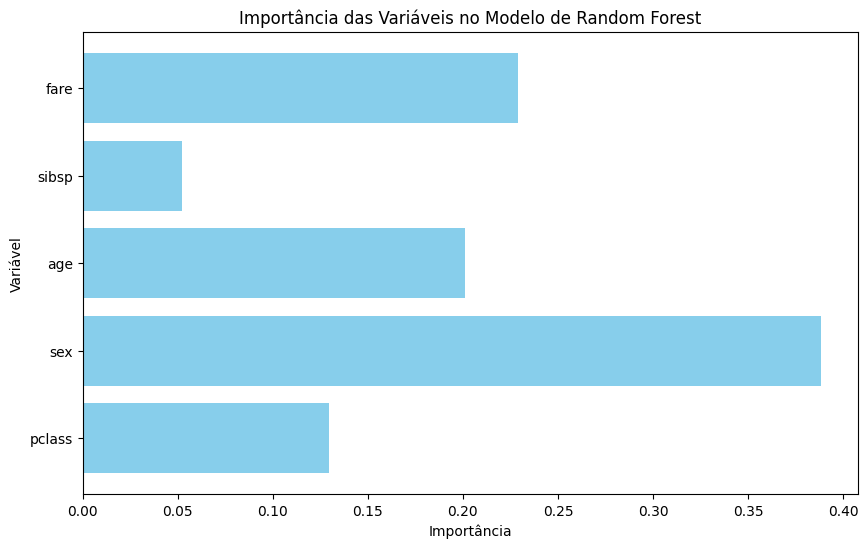

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(x.columns, importances, color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis no Modelo de Random Forest')
plt.show()

# 8. Comparação de Desempenho:

- Comparar os resultados das duas abordagens (Árvore de Decisão e Random Forest) e discutir qual modelo apresentou melhor performance.
- Incluam métricas como acurácia, precisão e recall.
- Explorem como a importância das variáveis ajuda a entender o comportamento do modelo.

In [27]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import cross_validate
scoring = {'accuracy': 'accuracy',
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score)}
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_validate(dt_model, x, y, cv=5, scoring=scoring)
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_validate(rf_model, x, y, cv=5, scoring=scoring)
print(f"Árvore de Decisão - Acurácia: {dt_scores['test_accuracy'].mean():.4f}, Precisão: {dt_scores['test_precision'].mean():.4f}, Recall: {dt_scores['test_recall'].mean():.4f}")
print(f"Random Forest - Acurácia: {rf_scores['test_accuracy'].mean():.4f}, Precisão: {rf_scores['test_precision'].mean():.4f}, Recall: {rf_scores['test_recall'].mean():.4f}")

Árvore de Decisão - Acurácia: 0.7711, Precisão: 0.7053, Recall: 0.6988
Random Forest - Acurácia: 0.8171, Precisão: 0.7743, Recall: 0.7397


# 9. Extra:

- Testar outras variáveis do dataset, como Embarked e Parch, e verificar se a - inclusão delas melhora o desempenho do modelo.

In [37]:
x = df[['pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked', 'parch']]

dt_model_new = DecisionTreeClassifier(random_state=42)
dt_scores_new = cross_validate(dt_model_new, x , y, cv=5, scoring=scoring)

rf_model_new = RandomForestClassifier(random_state=42)
rf_scores_new = cross_validate(rf_model_new, x , y, cv=5, scoring=scoring)

print(f"Árvore de Decisão (com novas variáveis) - Acurácia: {dt_scores_new['test_accuracy'].mean():.4f}, Precisão: {dt_scores_new['test_precision'].mean():.4f}, Recall: {dt_scores_new['test_recall'].mean():.4f}")
print(f"Random Forest (com novas variáveis) - Acurácia: {rf_scores_new['test_accuracy'].mean():.4f}, Precisão: {rf_scores_new['test_precision'].mean():.4f}, Recall: {rf_scores_new['test_recall'].mean():.4f}")

Árvore de Decisão (com novas variáveis) - Acurácia: 0.7655, Precisão: 0.6947, Recall: 0.6930
Random Forest (com novas variáveis) - Acurácia: 0.8093, Precisão: 0.7624, Recall: 0.7337
